### DSML PROJECT: 
# BUILDING ML MODEL TO PREDICT CREDIT  CARD DEFAULTS 

## STAGE 1: Pre-Processing and Cleaning

In [1]:
# Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
df = pd.read_excel(
    'default of credit card clients.xls', 
    header=1
)

In [5]:
#understanding datset  and preprocessing

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

# renaming the variable PAY_0 to PAY_1 to match the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
df.isnull().sum()

#confirming there is not null values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
df.drop(columns=['ID'],inplace=True)

#droping the ID variable. (not significant in model building)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

## STAGE 02: Exploratory Data Analysis (EDA) with visualizations.

### visualisation

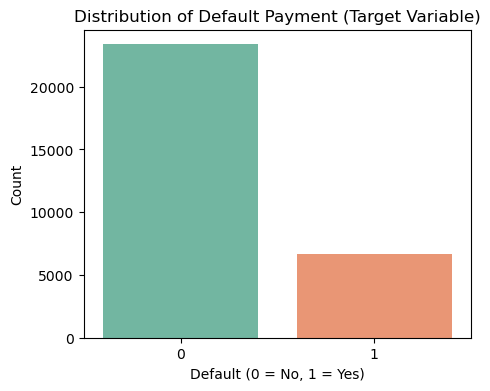

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x='default payment next month', data=df, hue ='default payment next month',palette='Set2', legend = False)
plt.title("Distribution of Default Payment (Target Variable)")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [16]:
#Showing correlation heatmap

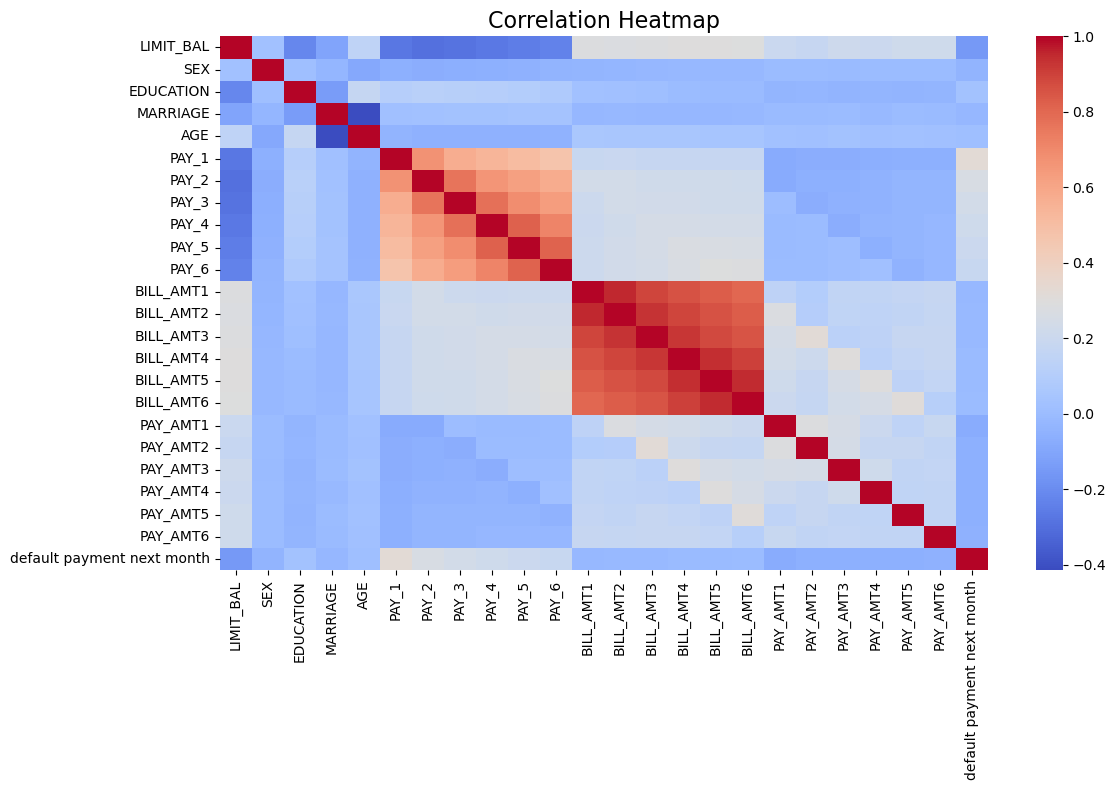

In [17]:
plt.figure(figsize= (12,8))
corr = df.corr(method='pearson')
sns.heatmap(
    corr, 
    cmap = "coolwarm", 
    annot =False
)
plt.title("Correlation Heatmap", fontsize = 16)
plt.tight_layout()
plt.show()

In [18]:
#visualising Education vs default

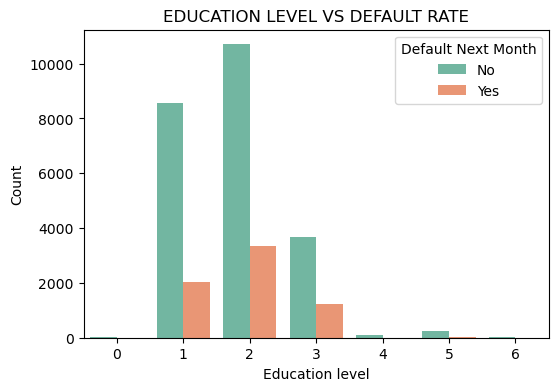

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='EDUCATION', 
    data=df,
    hue= 'default payment next month', 
    palette= 'Set2'
)
plt.title("EDUCATION LEVEL VS DEFAULT RATE")
plt.xlabel("Education level")
plt.ylabel("Count")
plt.legend(title="Default Next Month", labels=["No", "Yes"])
plt.show()

In [20]:
#visualisation of Marriage vs Dafault

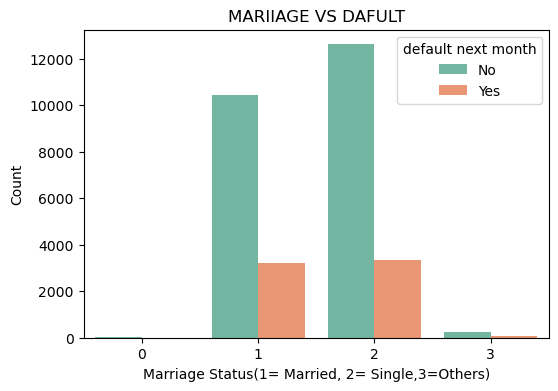

In [21]:
plt.figure(figsize=(6,4,))
sns.countplot(
    x='MARRIAGE',
    hue= 'default payment next month',
    data = df,
    palette ="Set2"
)
plt.title("MARIIAGE VS DAFULT")
plt.xlabel("Marriage Status(1= Married, 2= Single,3=Others)")
plt.ylabel("Count")
plt.legend(title= "default next month", labels=["No","Yes"])
plt.show()

In [22]:
#Visualisation of Age vs Dafault

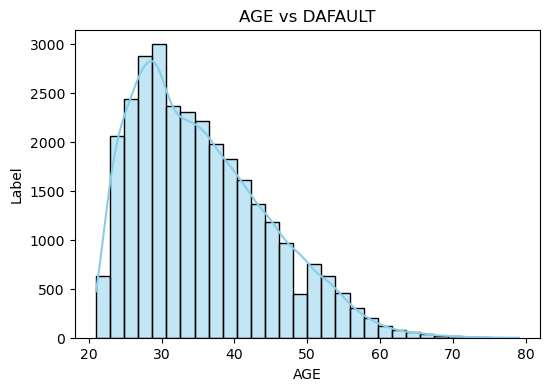

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['AGE'],bins=30, kde=True, color= 'skyblue')
plt.title("AGE vs DAFAULT")
plt.xlabel("AGE")
plt.ylabel("Label")
plt.show()

### outliers detection and fixing

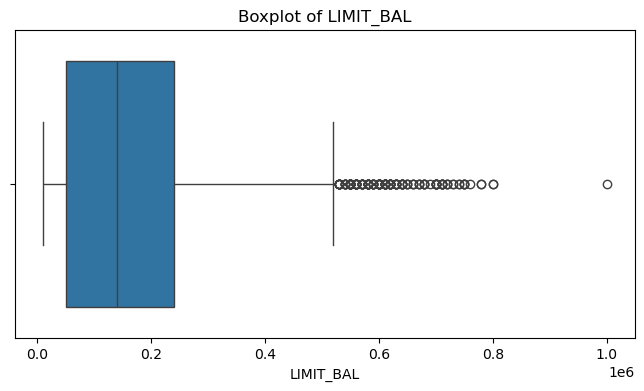

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title('Boxplot of LIMIT_BAL')
plt.show()

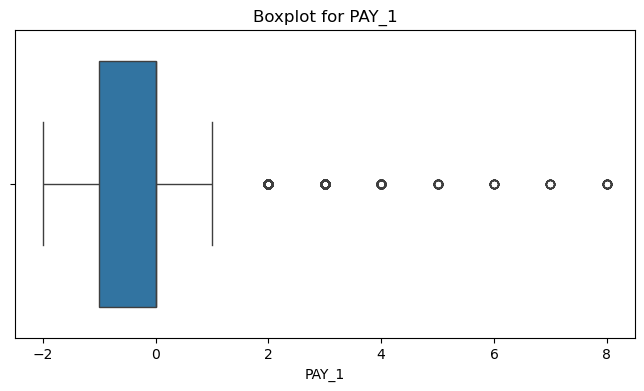

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['PAY_1'])
plt.title('Boxplot for PAY_1')
plt.show()

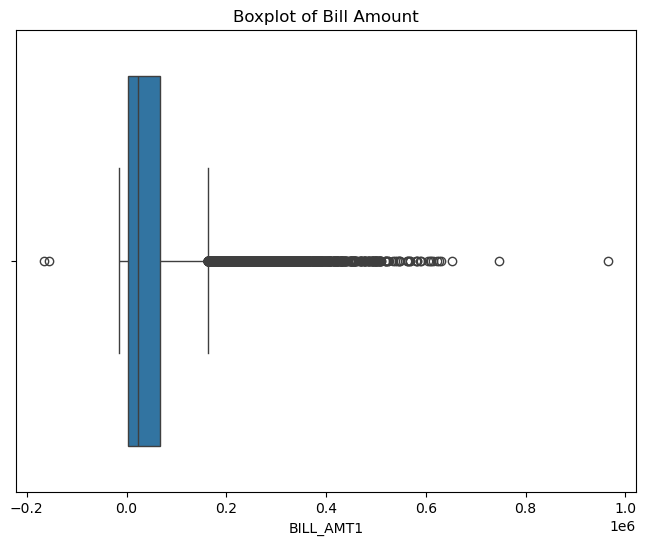

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['BILL_AMT1'])
plt.title('Boxplot of Bill Amount')
plt.show()

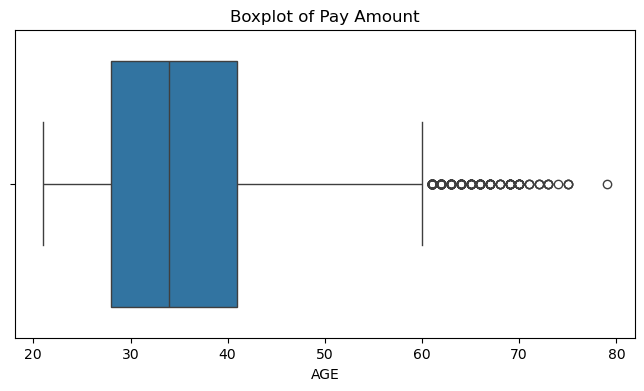

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['AGE'])
plt.title('Boxplot of Pay Amount')
plt.show()

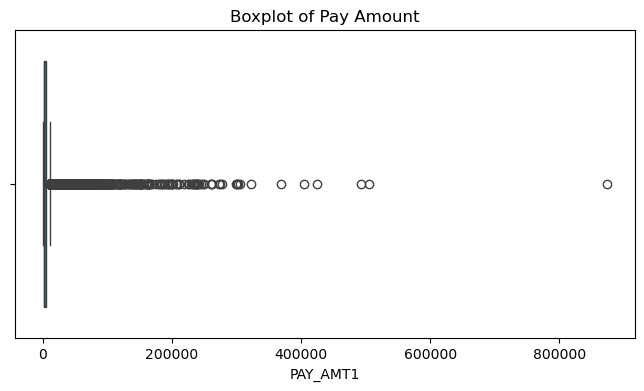

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['PAY_AMT1'])
plt.title('Boxplot of Pay Amount')
plt.show()

In [29]:
numeric_cols = ['LIMIT_BAL']+\
               [f'BILL_AMT{i}' for i in range(1,7)] + \
               [f'PAY_AMT{i}' for i in range(1,7)] +\
               [f'AGE']

In [30]:
def remove_outliers_iqr(df, numeric_cols):
    df = df.copy()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    
    return df

In [31]:
df = remove_outliers_iqr(df, numeric_cols)

In [32]:
print("Rows after removing outliers:", df.shape[0])

Rows after removing outliers: 14557


In [33]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")

LIMIT_BAL: 392 outliers
BILL_AMT1: 250 outliers
BILL_AMT2: 227 outliers
BILL_AMT3: 270 outliers
BILL_AMT4: 111 outliers
BILL_AMT5: 35 outliers
BILL_AMT6: 58 outliers
PAY_AMT1: 220 outliers
PAY_AMT2: 212 outliers
PAY_AMT3: 183 outliers
PAY_AMT4: 389 outliers
PAY_AMT5: 253 outliers
PAY_AMT6: 190 outliers
AGE: 0 outliers


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14557 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   14557 non-null  int64
 1   SEX                         14557 non-null  int64
 2   EDUCATION                   14557 non-null  int64
 3   MARRIAGE                    14557 non-null  int64
 4   AGE                         14557 non-null  int64
 5   PAY_1                       14557 non-null  int64
 6   PAY_2                       14557 non-null  int64
 7   PAY_3                       14557 non-null  int64
 8   PAY_4                       14557 non-null  int64
 9   PAY_5                       14557 non-null  int64
 10  PAY_6                       14557 non-null  int64
 11  BILL_AMT1                   14557 non-null  int64
 12  BILL_AMT2                   14557 non-null  int64
 13  BILL_AMT3                   14557 non-null  int64
 14  BILL_AMT4  

### Scaling

In [35]:
scaler = StandardScaler()

In [36]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [37]:
df[numeric_cols].describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
count,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04,1.455700e+04
mean,8.102638e-17,6.296628e-17,5.942748e-17,-5.759706e-17,3.123908e-17,4.490618e-17,-2.538176e-17,1.025032e-17,4.295374e-17,-1.015270e-16,3.050692e-17,-5.613273e-17,-3.709641e-17,-2.259953e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-1.023029e+00,-1.102727e+00,-1.175752e+00,-1.616136e+00,-1.747240e+00,-2.087350e+00,-2.348401e+00,-1.096035e+00,-1.087754e+00,-1.007033e+00,-9.185320e-01,-9.351851e-01,-9.079063e-01,-1.481001e+00
25%,-6.466257e-01,-8.486553e-01,-8.690042e-01,-8.782561e-01,-8.861080e-01,-8.741489e-01,-8.493909e-01,-1.096035e+00,-1.087754e+00,-1.007033e+00,-9.185320e-01,-9.351851e-01,-9.079063e-01,-8.528299e-01
50%,-3.643230e-01,-2.982742e-01,-2.965977e-01,-3.014323e-01,-3.309543e-01,-3.320865e-01,-3.788799e-01,-4.007008e-02,-5.590700e-02,-9.873702e-02,-2.397120e-01,-2.323790e-01,-2.544244e-01,-2.246591e-01
75%,5.766858e-01,6.042421e-01,5.923323e-01,5.353051e-01,6.142229e-01,6.563802e-01,6.406503e-01,4.527135e-01,4.458871e-01,6.278997e-01,5.135777e-01,5.708279e-01,6.213026e-01,7.175972e-01
max,3.682015e+00,5.358148e+00,4.313321e+00,4.122160e+00,3.599379e+00,3.278519e+00,3.028842e+00,3.973300e+00,3.788126e+00,3.543530e+00,3.855167e+00,3.895101e+00,3.591026e+00,3.020890e+00


In [38]:
df[numeric_cols].mean()

LIMIT_BAL    8.102638e-17
BILL_AMT1    6.296628e-17
BILL_AMT2    5.942748e-17
BILL_AMT3   -5.759706e-17
BILL_AMT4    3.123908e-17
BILL_AMT5    4.490618e-17
BILL_AMT6   -2.538176e-17
PAY_AMT1     1.025032e-17
PAY_AMT2     4.295374e-17
PAY_AMT3    -1.015270e-16
PAY_AMT4     3.050692e-17
PAY_AMT5    -5.613273e-17
PAY_AMT6    -3.709641e-17
AGE         -2.259953e-16
dtype: float64

In [39]:
#Train - test split

In [40]:
x=df.drop(columns=['default payment next month'])
y=df['default payment next month']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [42]:
print('train shape',x_train.shape)
print('test shape', x_test.shape)

train shape (11645, 23)
test shape (2912, 23)


In [43]:
print('train target distribution:\n', y_train.value_counts(normalize=True))
print('test terget distribution:\n',y_test.value_counts(normalize=True))

train target distribution:
 default payment next month
0    0.720481
1    0.279519
Name: proportion, dtype: float64
test terget distribution:
 default payment next month
0    0.720467
1    0.279533
Name: proportion, dtype: float64


## STAGEV03: Building ML Model

In [44]:
#testing Models

In [68]:
def train_and_evaluate_logistic_regression(x_train, x_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    print("Model: Logistic Regression")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
    
    # Confusion Matrix & Report
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Logistic Regression")
    plt.legend()
    plt.show()
    
    return model 

Model: Logistic Regression
Accuracy: 0.760989010989011
Precision: 0.6832298136645962
Recall: 0.2702702702702703
F1 Score: 0.3873239436619718
ROC-AUC: 0.7435855020459405

Confusion Matrix:
 [[1996  102]
 [ 594  220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85      2098
           1       0.68      0.27      0.39       814

    accuracy                           0.76      2912
   macro avg       0.73      0.61      0.62      2912
weighted avg       0.75      0.76      0.72      2912



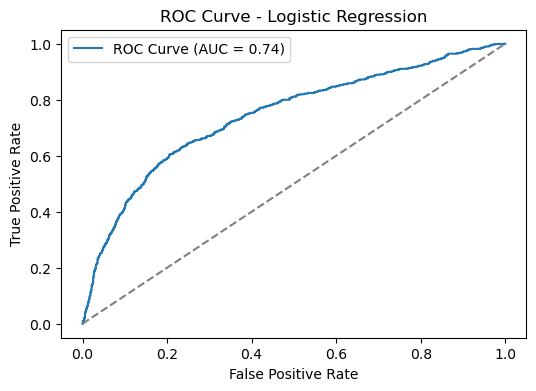

In [69]:
log_reg = train_and_evaluate_logistic_regression(x_train, x_test, y_train, y_test)

In [70]:
def train_and_evaluate_svc(x_train, x_test, y_train, y_test):
    model = SVC(probability=True, kernel='rbf', random_state=42)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    print("Model: Support Vector Classifier (SVC)")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
    
    # Confusion Matrix & Report
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - SVC")
    plt.legend()
    plt.show()
    
    return model

Model: Support Vector Classifier (SVC)
Accuracy: 0.7750686813186813
Precision: 0.6827586206896552
Recall: 0.36486486486486486
F1 Score: 0.4755804643714972
ROC-AUC: 0.7325869612571233

Confusion Matrix:
 [[1960  138]
 [ 517  297]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86      2098
           1       0.68      0.36      0.48       814

    accuracy                           0.78      2912
   macro avg       0.74      0.65      0.67      2912
weighted avg       0.76      0.78      0.75      2912



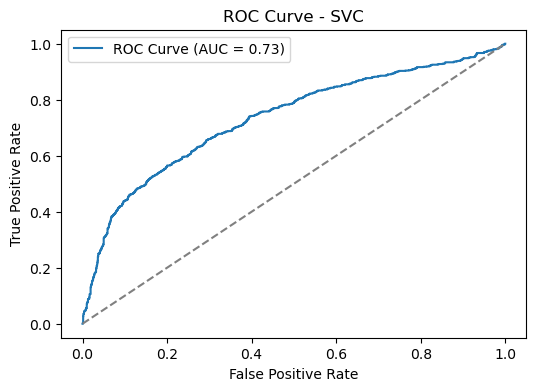

In [71]:
svc_model = train_and_evaluate_svc(x_train, x_test, y_train, y_test)

In [72]:
def train_and_evaluate_random_forest(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    print("Model: Random Forest Classifier")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
    
    # Confusion Matrix & Report
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Random Forest")
    plt.legend()
    plt.show()
    
    return model

Model: Random Forest Classifier
Accuracy: 0.7685439560439561
Precision: 0.6383399209486166
Recall: 0.3968058968058968
F1 Score: 0.4893939393939394
ROC-AUC: 0.744931700484608

Confusion Matrix:
 [[1915  183]
 [ 491  323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      2098
           1       0.64      0.40      0.49       814

    accuracy                           0.77      2912
   macro avg       0.72      0.65      0.67      2912
weighted avg       0.75      0.77      0.75      2912



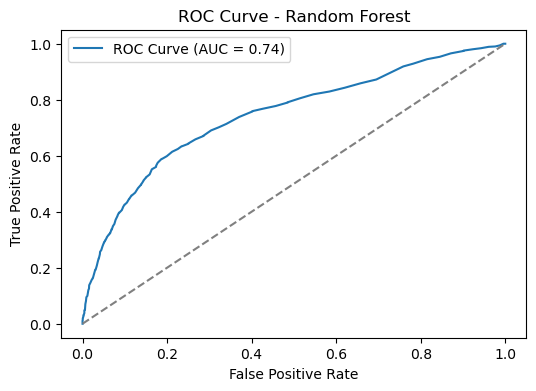

In [73]:
rf_model = train_and_evaluate_random_forest(x_train, x_test, y_train, y_test)

In [74]:
def train_and_evaluate_knn(x_train, x_test, y_train, y_test, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    print("Model: K-Nearest Neighbors Classifier")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
    
    # Confusion Matrix & Report
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend()
    plt.show()
    
    return model

Model: K-Nearest Neighbors Classifier
Accuracy: 0.7438186813186813
Precision: 0.5615942028985508
Recall: 0.3808353808353808
F1 Score: 0.4538799414348463
ROC-AUC: 0.7067784809681854

Confusion Matrix:
 [[1856  242]
 [ 504  310]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83      2098
           1       0.56      0.38      0.45       814

    accuracy                           0.74      2912
   macro avg       0.67      0.63      0.64      2912
weighted avg       0.72      0.74      0.73      2912



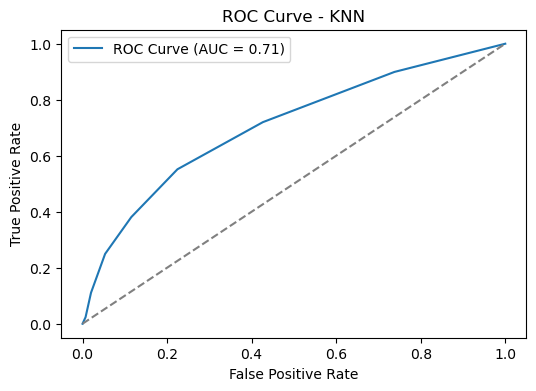

In [75]:
knn_model = train_and_evaluate_knn(x_train, x_test, y_train, y_test, n_neighbors=7)

In [ ]:
#comparison of models

In [76]:
models = ["Logistic Regression", "SVM", "Random Forest", "KNN"]

scores = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn)
]

comparison = pd.DataFrame({"Model": models, "Accuracy": scores})
print(comparison.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


                 Model  Accuracy
0                  SVM  0.775069
1        Random Forest  0.768544
2  Logistic Regression  0.760989
3                  KNN  0.736951


In [ ]:
#Selected Model =SVM (high accuracy)